This Jupyter Notebook plots and analyzes ligand-detected 19F pseudo-2D ligand-detected transverse (spin-spin, R2,eff) nuclear magnetic resonance spectroscopy (NMR) relaxation data of 5-fluoroindole in the absence and presence 1.7 mg/mL of the non-structural protein 5A, domains 2 and 3 (NS5A-D2D3) and 1.7 mg/mL of PEG-20k. Data should first be downloaded from Zenodo as detailed in ../README.md. Data are in .ft2 format. Filenames indicate protein concentration and experimental replica index (e.g. '28_7uM_0.ft2' indicates 28.7uM NS5A-D2D3, first experimental replicate). Each experiment also contains repeats.

In [1]:
# import useful stuff
%matplotlib inline
import os, sys
import nmrglue as ng
import numpy as np
import glob
import json
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import subplots
from scipy.optimize import curve_fit
from fit_raw import * # the included fit_raw.py file contains some useful functions

d_86_0uM_0


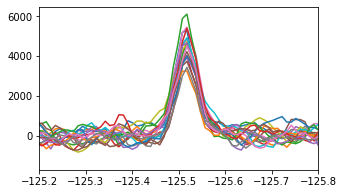

d_86_0uM_1


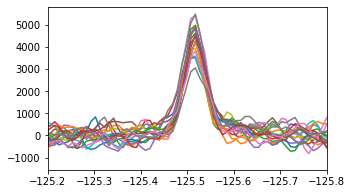

d_76_8uM_1


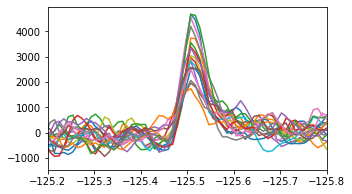

d_76_8uM_0


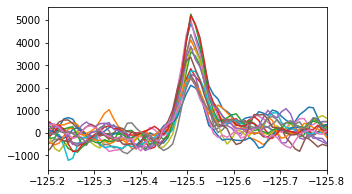

d_76_8uM_2


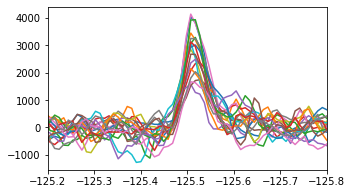

d_0_0uM_1


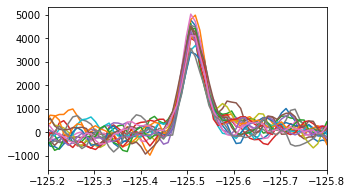

d_0_0uM_0


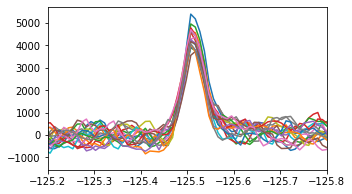

In [2]:
# Plot various 1D slices from each R2eff-CPMG experiment

# Create an instance of the fit_raw class
fit_1D_19F = fit_raw()

# Read and process data
dic, data_peg = fit_1D_19F.read_data('19F_R2eff_PEG_control_ft2_data/PEG/')
dic_d2d3, data_d2d3 = fit_1D_19F.read_data('19F_R2eff_PEG_control_ft2_data/D2D3/')
dic_mol, data_mol = fit_1D_19F.read_data('19F_R2eff_PEG_control_ft2_data/Mol_alone/')

# Check raw data
for key in data_peg.keys():
    print(key)
    fig, ax = plt.subplots(figsize=(5,3))
    # Get the x-axis values (ppm_real)
    udic = ng.pipe.guess_udic(dic[key], data_peg[key])
    ppm_real = np.linspace(-120+-(udic[1]['sw']/udic[1]['obs'])/2, -120+(udic[1]['sw']/udic[1]['obs'])/2, num=data_peg[key][0].shape[0])
    for i in range(0,data_peg[key].shape[0]):
    # Plot the slices 
        ax.plot(ppm_real, data_peg[key][i], label=key + " uM")
        ax.set_xlim(-125.2, -125.8)
    plt.show()
    
# Check raw data
for key in data_d2d3.keys():
    print(key)
    fig, ax = plt.subplots(figsize=(5,3))
    # Get the x-axis values (ppm_real)
    udic = ng.pipe.guess_udic(dic_d2d3[key], data_d2d3[key])
    ppm_real = np.linspace(-120+-(udic[1]['sw']/udic[1]['obs'])/2, -120+(udic[1]['sw']/udic[1]['obs'])/2, num=data_d2d3[key][0].shape[0])
    for i in range(0,data_d2d3[key].shape[0]):
    # Plot the slices 
        ax.plot(ppm_real, data_d2d3[key][i], label=key + " uM")
        ax.set_xlim(-125.2, -125.8)
    plt.show()
    
# Check raw data
for key in data_mol.keys():
    print(key)
    fig, ax = plt.subplots(figsize=(5,3))
    # Get the x-axis values (ppm_real)
    udic = ng.pipe.guess_udic(dic_mol[key], data_mol[key])
    ppm_real = np.linspace(-120+-(udic[1]['sw']/udic[1]['obs'])/2, -120+(udic[1]['sw']/udic[1]['obs'])/2, num=data_mol[key][0].shape[0])
    for i in range(0,data_mol[key].shape[0]):
    # Plot the slices 
        ax.plot(ppm_real, data_mol[key][i], label=key + " uM")
        ax.set_xlim(-125.2, -125.8)
    plt.show()

Now fitting d_86_0uM_0


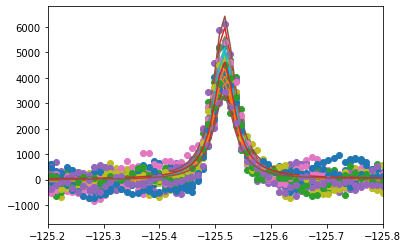

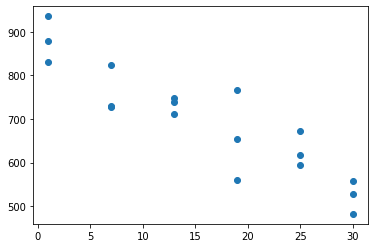

Now fitting d_86_0uM_1


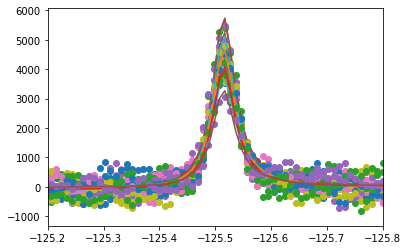

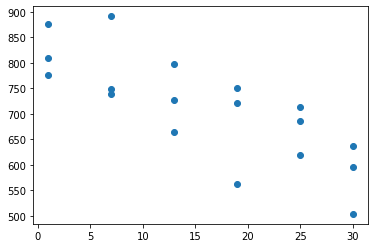

For 86.0 uM: R2: 0.3326424975052817 +/- 0.029669444350900506 seconds^-1
Now fitting d_76_8uM_1


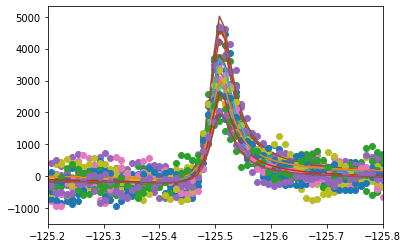

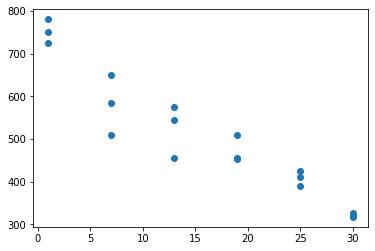

Now fitting d_76_8uM_0


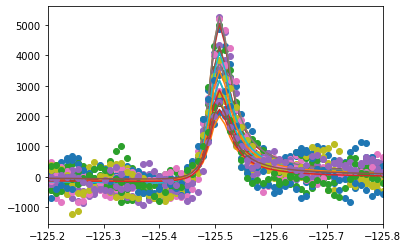

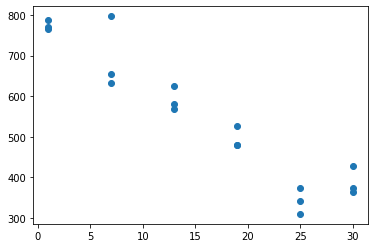

Now fitting d_76_8uM_2


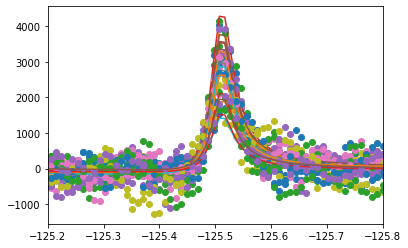

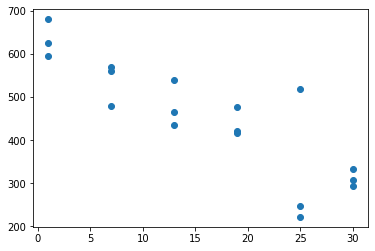

For 76.8 uM: R2: 0.6556337769809227 +/- 0.03188279676890743 seconds^-1
Now fitting d_0_0uM_1


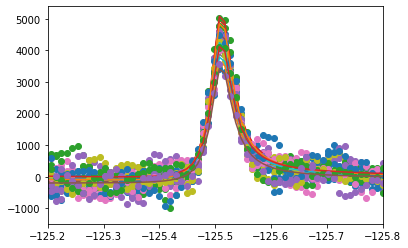

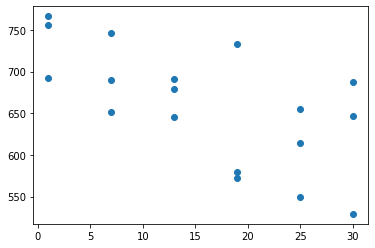

Now fitting d_0_0uM_0


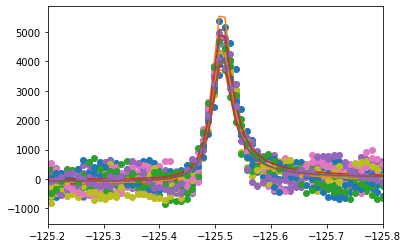

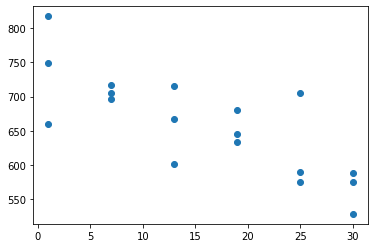

For 0.0 uM: R2: 0.19007558234981922 +/- 0.028860561486888616 seconds^-1


In [3]:
# Create a dictionary to group data by concentration

#PEG        

group_dict = {}
for key in data_peg.keys():
    prefix = key.split('_')[1:3]
    prefix_dec = prefix[1].split('uM')
    join = prefix[0] + "." + "".join(prefix_dec)
    if join.startswith('d'):
        continue
    if join not in group_dict:
        group_dict[join] = []
    group_dict[join].append(key)

# Create a dictionary to store vals by concentration
concs_r2_av = {}
concs_r2_se = {}

vclist = np.asarray([1,7,13,19,25,30,1,7,13,19,25,30,1,7,13,19,25,30])

# Loop over grouped data, calculate average and standard error, and plot
for key in group_dict:
    # Calculate average and standard error
    ints = []
    if key != '50.0':
        for i in group_dict[key]:
            print('Now fitting', i)
            # fit each slice to get intensities
            intensities = fit_1D_19F.fit_pseudo2D(dic=dic[i], data_list=data_peg[i])
            ints.append(intensities)
            plt.scatter(vclist,intensities)
            plt.show()
        # fit intensities to get R2
        ppopt, pcov, R2, R2_error, x_sort, y_sort, y_fit = fit_1D_19F.fit_R2_data(x=vclist*4.*0.01, y=np.mean(np.asarray(ints), axis=0) )
        print('For', key,'uM:', 'R2:', R2, '+/-', R2_error, 'seconds^-1')


#D2D3        
        
# Create a dictionary to group data by concentration
group_dict = {}
for key in data_d2d3.keys():
    prefix = key.split('_')[1:3]
    prefix_dec = prefix[1].split('uM')
    join = prefix[0] + "." + "".join(prefix_dec)
    if join.startswith('d'):
        continue
    if join not in group_dict:
        group_dict[join] = []
    group_dict[join].append(key)

# Create a dictionary to store vals by concentration
concs_r2_av = {}
concs_r2_se = {}

vclist = np.asarray([1,7,13,19,25,30,1,7,13,19,25,30,1,7,13,19,25,30])

# Loop over grouped data, calculate average and standard error, and plot
for key in group_dict:
    # Calculate average and standard error
    ints_d2d3 = []
    if key != '50.0':
        for i in group_dict[key]:
            print('Now fitting', i)
            # fit each slice to get intensities
            intensities_d2d3 = fit_1D_19F.fit_pseudo2D(dic=dic_d2d3[i], data_list=data_d2d3[i])
            #intensities = fit_1D_19F.fit_pseudo2D(dic=dic[i], data_list=data_peg[i])
            ints_d2d3.append(intensities_d2d3)
            plt.scatter(vclist,intensities_d2d3)
            plt.show()
        # fit intensities to get R2
        ppopt_d2d3, pcov_d2d3, R2_d2d3, R2_error_d2d3, x_sort_d2d3, y_sort_d2d3, y_fit_d2d3 = fit_1D_19F.fit_R2_data(x=vclist*4.*0.01, y=np.mean(np.asarray(ints_d2d3), axis=0) )
        print('For', key,'uM:', 'R2:', R2_d2d3, '+/-', R2_error_d2d3, 'seconds^-1')

        
#MOL        
        
# Create a dictionary to group data by concentration
group_dict = {}
for key in data_mol.keys():
    prefix = key.split('_')[1:3]
    prefix_dec = prefix[1].split('uM')
    join = prefix[0] + "." + "".join(prefix_dec)
    if join.startswith('d'):
        continue
    if join not in group_dict:
        group_dict[join] = []
    group_dict[join].append(key)

# Create a dictionary to store vals by concentration
concs_r2_av = {}
concs_r2_se = {}

vclist = np.asarray([1,7,13,19,25,30,1,7,13,19,25,30,1,7,13,19,25,30])

# Loop over grouped data, calculate average and standard error, and plot
for key in group_dict:
    # Calculate average and standard error
    ints_mol = []
    if key != '50.0':
        for i in group_dict[key]:
            print('Now fitting', i)
            # fit each slice to get intensities
            intensities_mol = fit_1D_19F.fit_pseudo2D(dic=dic_mol[i], data_list=data_mol[i])
            #intensities = fit_1D_19F.fit_pseudo2D(dic=dic[i], data_list=data_peg[i])
            ints_mol.append(intensities_mol)
            plt.scatter(vclist,intensities_mol)
            plt.show()
        # fit intensities to get R2
        ppopt_mol, pcov_mol, R2_mol, R2_error_mol, x_sort_mol, y_sort_mol, y_fit_mol = fit_1D_19F.fit_R2_data(x=vclist*4.*0.01, y=np.mean(np.asarray(ints_mol), axis=0) )
        print('For', key,'uM:', 'R2:', R2_mol, '+/-', R2_error_mol, 'seconds^-1')        
        


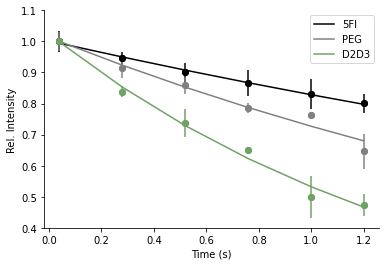

In [4]:
#make R2 plot

#reshape, sort, average data
chunked_ysort = y_sort_mol.reshape(-1, 3)
averages_y = np.mean(chunked_ysort, axis=1)

err_mol = np.std(chunked_ysort, axis=1)**2/averages_y**2/np.sqrt(3)
err_0_mol = err_mol[0]**2/averages_y.max()**2/np.sqrt(3)
err_prop_mol = np.sqrt(err_mol+err_0_mol)

chunked_xsort = x_sort_mol.reshape(-1, 3)
averages_x = np.mean(chunked_xsort, axis=1)

chunked_ysort_peg = y_sort.reshape(-1, 3)
averages_y_peg = np.mean(chunked_ysort_peg, axis=1)

err_peg = np.std(chunked_ysort_peg, axis=1)**2/averages_y_peg**2/np.sqrt(3)
err_0_peg = err_peg[0]**2/averages_y_peg.max()**2/np.sqrt(3)
err_prop_peg = np.sqrt(err_peg+err_0_peg)


chunked_ysort_d2d3 = y_sort_d2d3.reshape(-1, 3)
averages_y_d2d3 = np.mean(chunked_ysort_d2d3, axis=1)

err_d2d3 = np.std(chunked_ysort_d2d3, axis=1)**2/averages_y_d2d3**2/np.sqrt(3)
err_0_d2d3 = err_d2d3[0]**2/averages_y_d2d3.max()**2/np.sqrt(3)
err_prop_d2d3 = np.sqrt(err_d2d3+err_0_d2d3)


#make plot
fig, ax = plt.subplots()

plt.errorbar(averages_x, averages_y/averages_y.max(), yerr=err_prop_mol, fmt="o", color='black')
plt.plot(x_sort, y_fit_mol/y_sort_mol[0:3].mean(), 'r-', label='5FI', color='black')    
plt.errorbar(averages_x, averages_y/averages_y.max(),  fmt="o", color='black')


plt.errorbar(averages_x, averages_y_peg/averages_y_peg.max(), yerr=err_prop_peg, fmt="o", color='grey')
plt.plot(x_sort, y_fit/y_sort[0:3].mean(), 'r-', label='PEG', color='grey')
plt.errorbar(averages_x, averages_y_peg/averages_y_peg.max(),  fmt="o", color='grey')

plt.errorbar(averages_x, averages_y_d2d3/averages_y_d2d3.max(), yerr=err_prop_d2d3, fmt="o", color='#70a165')
plt.plot(x_sort, y_fit_d2d3/y_sort_d2d3[0:3].mean(), 'r-', label='D2D3', color='#70a165')
plt.errorbar(averages_x, averages_y_d2d3/averages_y_d2d3.max(), fmt="o", color='#70a165')


ax.set_xlabel("Time (s)")
ax.set_ylabel("Rel. Intensity")

ax.axes.get_yaxis().set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.set_ylim([0.4,1.1])
ax.legend()
plt.show()